# Assignment 2  
## Applied Machine Learning

Andrew Chan 
EBE869

# 1. [20 pts] At a high-level, without entering into mathematical details, compare and contrast the following classifiers:  
* **Perceptron**
  * Does the method solve an optimization problem, if yes what is the cost function?
    **Yes, the algorithm uses the difference between the actual and predicted target values: $$y^{(i)}-\hat{y}^{(i)}$$ and thus attempts to minimize classification error.**
  * Speed? Strength? Robustness?   
    **Speed: Slow if learning rate is too small.**  
    **Strength: Weak since does not always converge**  
    **Robustness: Not robust since does not always converge.**  
  * Feature type that the classifier naturally uses (e.g. based on the comparison measure,  such as entropy or distance)  
    **Distance**
  * Which one will be the first that you would try on your dataset?   
    **I would not use this first since it never converges for datasets that are not perfectly linearly separable.**

* **SVM**  
  * Does the method solve an optimization problem, if yes what is the cost function?  
    **Yes, it attempts to maximize the margin between the decision boundary and the support vectors (vectors closest to boundary):$$\frac{1}{2}||\bf{w}||^2+C(\sum{i}(\zeta^{(i)}))$$**
  * Speed? Strength? Robustness?    
    **Speed: speed is slowest compared to other methods.**   
    **Strength: good for two class problems and is for implementing the kernel trick to solve nonlinear classification problems.**    
    **Robustness: Very robust as it is less prone to generalization error since there are large margins.**    
  * Feature type that the classifier naturally uses (e.g. based on the comparison measure,  such as entropy or distance)
     **Distance**
  * Which one will be the first that you would try on your dataset?
    **This is the first I would try since it has better generalization.**

* **Decision Tree** 
  * Does the method solve an optimization problem, if yes what is the cost function?  
    **Yes, it is optimizing information gain at each decision split:$$IG(D_{p},f)=I(D_{p})-\frac{N_{left}}{N_{p}}I(D_{left})-\frac{N_{right}}{N_{p}}I(D_{right}))$$ so that the child nodes are as pure as possible so that at the leaf nodes each child has the most homogenous class.**  
    
  * Speed? Strength? Robustness?  
    **Speed: faster than random forest since it only grows one tree.**  
    **Strength: good for explainability since it is very easy to interpret.**  
    **Robustness: Can easily lead to generalization if we do not prune the tree since the deeper the tree is the more complex the decision boundary.**  
  * Feature type that the classifier naturally uses (e.g. based on the comparison measure,  such as entropy or distance)
      **Entropy can be used since it measures the amount of class uniformity with a single class having entropy 0 and uniform class distribution with entropy 1.**  
      
  * Which one will be the first that you would try on your dataset?
      **I would not try this first since it can be prone to overfitting the deeper we create our tree. However if I needed to create a model for interpretability or feature selection, I may use this model first because it is very easy to visualize and explain to the end customer**

* **Random Forest**
  * Does the method solve an optimization problem, if yes what is the cost function?  
      **Yes, it is optimizing information gain at each decision split:$$IG(D_{p},f)=I(D_{p})-\frac{N_{left}}{N_{p}}I(D_{left})-\frac{N_{right}}{N_{p}}I(D_{right}))$$ so that the child nodes are as pure as possible so that at the leaf nodes each child has the most homogenous class.**  
  * Speed? Strength? Robustness?  
    **Speed: Slower than Decision Trees since we create a decision tree multiple times.**  
    **Strength: Much more generalizable and we don't have to worry about hyperparameter tuning since we do not get noise from just a single decision tree. Good for multiclass problems and mix of numerical and nominal data.**  
    **Robustness: Since we are using results from multiple trees, there is better performance than a single tree.**  
  * Feature type that the classifier naturally uses (e.g. based on the comparison measure,  such as entropy or distance)
     **Entropy can be used since it measures the amount of class uniformity with a single class having entropy 0 and uniform class distribution with entropy 1.** 
  * Which one will be the first that you would try on your dataset?
    **I may consider this as one of the first since it averages across multiple decision trees in the way that it randomly uses a subset of examples and features to avoid overfitting**

# 2. [20 pts] Using real datasets (can also be hypothetically constructed by yourself) define the following feature types, and give example values from your dataset. 

How would you represent these features in a computer program? (e.g. 32-bit integer? Floating point? String?)  

In [1]:
import numpy as np
import sklearn
import sklearn.datasets

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

## Numerical  

**Definition**: Data that is represented with numbers such as integers, floating point, or real numbers.

**Type**: You could represent it as integer, floating point. The example is 64 bit float.

In [3]:
breast_cancer.data.dtype

dtype('float64')

**Example**:

In [4]:
numerical_example = breast_cancer.data[0]

In [5]:
numerical_example

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

## Nominal   

**Definition**: Data that cannot be represented with quantitative value and is not ordinal. For example, class labels for gender (Male, Female).

**Type**: You can represent with integer or string. In this example it is Little-endian Unicode String 9 characters:

In [6]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

**Example**:

In [7]:
target_array = [breast_cancer.target_names[v] for v in breast_cancer.target]

In [8]:
target_array[0]

'malignant'

## Date  

**Definition**: Data that is time based such as the due date of this assignment: Feburary 8, 2021.

**Type**: You can represent with python datetime.date type.

**Example:**

In [9]:
import datetime

x = datetime.date(2021,2,9)
print(x)
print(type(x))

2021-02-09
<class 'datetime.date'>


## Text  

**Definition**: Data is represented using character strings.

**Type**: You can represent with strings or characters. The example uses string.

**Example**:

In [10]:
text_example = "text example"
print(text_example)
print(type(text_example))

text example
<class 'str'>


## Image  

**Definition**: Arrays of numerical values that encode R,G,B pixels of a visible impression.

**Type**: Can represent using integers or floating point. The example uses 8 bit unsigned integer. 

In [11]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg')  

**Example**:

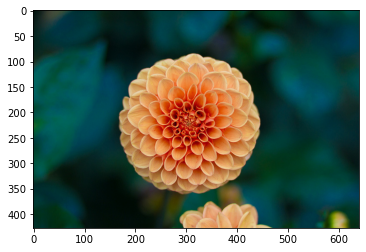

In [13]:
plt.imshow(flower)

In [14]:
flower.dtype

dtype('uint8')

## Dependent variable 

**Definition**: Also called ground truth, label, Target variables that correctly identify the class of training examples.

**Type** Can be integer, float, or string. The example is 32 bit int.

In [15]:
wine = sklearn.datasets.load_wine()

**Example**:

In [16]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
wine.target.dtype

dtype('int32')

# 3. [20 pts] Using online resources, research and find other classifier performance metricswhich are also as common as the accuracy metric. 
Write down the mathematical equations
and the meaning of the metrics that you found.

**Confusion matrix**

Provides a way to compare accuracy depending on target type.

True Positives 
**TP = number correctly predicted positive examples**  
True Negatives 
**TN = number of correctly predicted negative examples**    
False Positives 
**FP = number incorrectly predicted negative examples**    
False Negatives 
**FN = number of incorrectly predicted positive examples**    


**Precision**

Ratio of correct positive predictions to total positve predictions.

$$precision = \frac{TP}{TP + FP}$$

**Recall**

Ratio of correct positive predictions to total positve examples.

$$recall = \frac{TP}{TP + FN}$$

**False Positive Rate**

Ratio of incorrect positive predictions to total negative examples.

$$FPR = \frac{FP}{FP+TN}$$

**Area Under ROC curve**

Descretize from [0,1] using each value as the threshold for classifying example as positive. Then calculate Recall and FPR and plot a curve. The **Area under the ROC curve** will range from 0 to 1. Closest to 1 is the best as you would get only true positives and no false positives for all thresholds.

# 4. [40 pts] Implement a correlation program from scratch to look at the correlations between the features of Admission_Predict.csv dataset file (not provided, you have to download it by yourself by following the instructions in the module Jupyter notebook). 

In [18]:
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df = pd.read_csv('Admission_Predict.csv')
df = df.drop(['Serial No.'],axis=1)

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()

N rows=400, M columns=8


GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

## Implementation of Pearson Correlation Coefficient:

$$ r_{xy}=\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}} $$

In [19]:
def mean(x):
    sum = 0
    for i in x:
        sum = sum + i
    return sum/len(x)

In [20]:
def pearson_corr(df_x,df_y):
    # means
    x_bar = mean(df_x)
    y_bar = mean(df_y)
    # numerator
    numerator_sum = 0
    denominator_x_sum = 0
    denominator_y_sum = 0
    for i in range(len(df_x)):
        numerator_sum = numerator_sum + (df_x[i]-x_bar) * (df_y[i]-y_bar)
        denominator_x_sum = denominator_x_sum + (df_x[i]-x_bar)**2
        denominator_y_sum = denominator_y_sum + (df_y[i]-y_bar)**2
    # denominator
    denominator = math.sqrt(denominator_x_sum)*math.sqrt(denominator_y_sum)
    return numerator_sum/denominator

In [21]:
def correlation(dataframe):
    data = {}
    columnNames = []
    for col in dataframe:
        columnNames.append(col)
        data[col] = []
        for row in dataframe:
            data[col].append(pearson_corr(dataframe[row],dataframe[col]))
    new_df = pd.DataFrame (data, columns = columnNames, index = columnNames)
    return new_df

## Verification with built in function:

In [22]:
df.corr()

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.675732  
LOR                1.000000  0.670211  0.396859          0.669889  
CGPA               0.670211  1.000000  0.521654          0.873289  
Research           0.396859  0.521654  1.000000          0.553202  
Chance of Admit    0.669889  0.873289  0.553202          1.000000

## Answer:
## Invoking My implementation from Scratch:

In [23]:
correlation(df)

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.675732  
LOR                1.000000  0.670211  0.396859          0.669889  
CGPA               0.670211  1.000000  0.521654          0.873289  
Research           0.396859  0.521654  1.000000          0.553202  
Chance of Admit    0.669889  0.873289  0.553202          1.000000

#### They match!

Display the correlationmatrix where each row and column are the features, which should be an 8 by 8 matrix (should we use 'Serial no'?). You can use pandas DataFrame.corr() to verify correctness of yours.
Observe that the diagonal of this matrix should have all 1's and explain why? Since the last
column can be used as the target (dependent) variable, what do you think about the
correlations between all the variables? Which variable should be the most important for
prediction of 'Chance of Admit'?

## Answer:

We should not use Serial no. because that does not have anything to do with the target variable and could lead to erroneous model results.

The diagonals have all 1s because when a variable is compared against itself it will by the equation defintion become 1 since x = y.

Variables that are more highly correlated to the target variable could be better predictors for the target bariable. Variables that are highly correlated with each other may be redundant and we may be able to remove them using feature extraction. 

In this example, **CGPA** has the highest correlation coefficient of 0.87 and thus would be the best predictor of 'Chance of Admit'.
